In [2]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('dataset.pkl', 'rb') as file:
    df = pickle.load(file)

In [4]:
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,Gender,Policy_Type,Annual_Income,Insurance_Premium,Claim_Filed,Claim_Amount,Claim_History,Claim_History_Label,Risk_Score,Fraudulent_Claim
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Male,Life,2391536,29735.85,0,0.00,0,No Prior Claims,Low,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,Male,Auto,2354941,77009.15,0,0.00,5,High History,Medium,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Male,Health,2364434,93116.52,1,193090.15,1,Low History,Low,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,Male,Auto,2991571,72109.31,0,0.00,2,Low History,Low,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,Female,Health,4829376,180379.64,0,0.00,1,Low History,Medium,1


In [5]:
df.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [6]:
(df == 0).sum()

policy_id                               0
subscription_length                   276
vehicle_age                          5257
customer_age                            0
region_code                             0
region_density                          0
segment                                 0
model                                   0
fuel_type                               0
max_torque                              0
max_power                               0
engine_type                             0
airbags                                 0
is_esc                                  0
is_adjustable_steering                  0
is_tpms                                 0
is_parking_sensors                      0
is_parking_camera                       0
rear_brakes_type                        0
displacement                            0
cylinder                                0
transmission_type                       0
steering_type                           0
turning_radius                    

In [7]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Capitalize the first letter of each word and keep underscores
df.columns = df.columns.str.title()
df.columns

Index(['Policy_Id', 'Subscription_Length', 'Vehicle_Age', 'Customer_Age',
       'Region_Code', 'Region_Density', 'Segment', 'Model', 'Fuel_Type',
       'Max_Torque', 'Max_Power', 'Engine_Type', 'Airbags', 'Is_Esc',
       'Is_Adjustable_Steering', 'Is_Tpms', 'Is_Parking_Sensors',
       'Is_Parking_Camera', 'Rear_Brakes_Type', 'Displacement', 'Cylinder',
       'Transmission_Type', 'Steering_Type', 'Turning_Radius', 'Length',
       'Width', 'Gross_Weight', 'Is_Front_Fog_Lights', 'Is_Rear_Window_Wiper',
       'Is_Rear_Window_Washer', 'Is_Rear_Window_Defogger', 'Is_Brake_Assist',
       'Is_Power_Door_Locks', 'Is_Central_Locking', 'Is_Power_Steering',
       'Is_Driver_Seat_Height_Adjustable', 'Is_Day_Night_Rear_View_Mirror',
       'Is_Ecw', 'Is_Speed_Alert', 'Ncap_Rating', 'Claim_Status', 'Gender',
       'Policy_Type', 'Annual_Income', 'Insurance_Premium', 'Claim_Filed',
       'Claim_Amount', 'Claim_History', 'Claim_History_Label', 'Risk_Score',
       'Fraudulent_Claim'],
      

In [8]:
df.head()

,Policy_Id,Subscription_Length,Vehicle_Age,Customer_Age,Region_Code,Region_Density,Segment,Model,Fuel_Type,Max_Torque,...,Gender,Policy_Type,Annual_Income,Insurance_Premium,Claim_Filed,Claim_Amount,Claim_History,Claim_History_Label,Risk_Score,Fraudulent_Claim
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Male,Life,2391536,29735.85,0,0.00,0,No Prior Claims,Low,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,Male,Auto,2354941,77009.15,0,0.00,5,High History,Medium,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Male,Health,2364434,93116.52,1,193090.15,1,Low History,Low,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,Male,Auto,2991571,72109.31,0,0.00,2,Low History,Low,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,Female,Health,4829376,180379.64,0,0.00,1,Low History,Medium,1


In [9]:
df.dtypes

Policy_Id                            object
Subscription_Length                 float64
Vehicle_Age                         float64
Customer_Age                          int64
Region_Code                          object
Region_Density                        int64
Segment                              object
Model                                object
Fuel_Type                            object
Max_Torque                           object
Max_Power                            object
Engine_Type                          object
Airbags                               int64
Is_Esc                               object
Is_Adjustable_Steering               object
Is_Tpms                              object
Is_Parking_Sensors                   object
Is_Parking_Camera                    object
Rear_Brakes_Type                     object
Displacement                          int64
Cylinder                              int64
Transmission_Type                    object
Steering_Type                   

In [10]:
#creating a new dataframe which contains only numeric for the betterment of preprocessing steps.
df_num = df.select_dtypes(include = ['int32', 'int64', 'float64'])

In [11]:
df_num.head()

,Subscription_Length,Vehicle_Age,Customer_Age,Region_Density,Airbags,Displacement,Cylinder,Turning_Radius,Length,Width,Gross_Weight,Ncap_Rating,Claim_Status,Annual_Income,Insurance_Premium,Claim_Filed,Claim_Amount,Claim_History,Fraudulent_Claim
0,9.3,1.2,41,8794,6,1493,4,5.2,4300,1790,1720,3,0,2391536,29735.85,0,0.00,0,0
1,8.2,1.8,35,27003,2,1498,4,4.9,3995,1695,1051,4,0,2354941,77009.15,0,0.00,5,0
2,9.5,0.2,44,8794,6,1493,4,5.2,4300,1790,1720,3,0,2364434,93116.52,1,193090.15,1,0
3,5.2,0.4,44,73430,2,796,3,4.6,3445,1515,1185,0,0,2991571,72109.31,0,0.00,2,0
4,10.1,1.0,56,5410,2,1497,4,5.0,3990,1755,1490,5,0,4829376,180379.64,0,0.00,1,1


In [12]:
(df_num == 0).sum()

Subscription_Length      276
Vehicle_Age             5257
Customer_Age               0
Region_Density             0
Airbags                    0
Displacement               0
Cylinder                   0
Turning_Radius             0
Length                     0
Width                      0
Gross_Weight               0
Ncap_Rating            19097
Claim_Status           54844
Annual_Income              0
Insurance_Premium          0
Claim_Filed            41010
Claim_Amount           41010
Claim_History          29284
Fraudulent_Claim       51863
dtype: int64

In [13]:
df['Claim_Status'].unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: Claim_Status, Length: 58592, dtype: int64>

In [14]:
df['Claim_History'].unique

<bound method Series.unique of 0        0
1        5
2        1
3        2
4        1
        ..
58587    1
58588    2
58589    4
58590    1
58591    2
Name: Claim_History, Length: 58592, dtype: int32>

In [15]:
#After reviewing the new dataframe for zeros and null values, we observed that a significant number of zeros are present, some of which may hold relevance in certain contexts. Therefore, careful consideration is required to ensure that only the truly redundant values are removed.

In [16]:
#Now let us proceed by dropping the unwanted columns in the numerical data frame which might be helpful for the futute use.
#1. Ncap_Rating, 2. Claim_Status, 3. Claim_Filed
df_num.drop(columns=['Ncap_Rating','Claim_Status','Claim_Filed'], inplace=True)

In [17]:
len(df_num.columns)

16

In [18]:
(df_num==0).sum()

Subscription_Length      276
Vehicle_Age             5257
Customer_Age               0
Region_Density             0
Airbags                    0
Displacement               0
Cylinder                   0
Turning_Radius             0
Length                     0
Width                      0
Gross_Weight               0
Annual_Income              0
Insurance_Premium          0
Claim_Amount           41010
Claim_History          29284
Fraudulent_Claim       51863
dtype: int64

In [19]:
#We will populate the zero values in the **Subscription_Length** and **Vehicle_Age** columns, as the zeros in the other columns hold meaningful significance and should remain unchanged.
# Applying median imputation
for column in ['Subscription_Length', 'Vehicle_Age']:
    median_value = df_num[column].median()  # Compute median
    df_num[column] = df_num[column].replace(0, median_value)  # Replace zeros with median

In [20]:
(df_num==0).sum()

Subscription_Length        0
Vehicle_Age                0
Customer_Age               0
Region_Density             0
Airbags                    0
Displacement               0
Cylinder                   0
Turning_Radius             0
Length                     0
Width                      0
Gross_Weight               0
Annual_Income              0
Insurance_Premium          0
Claim_Amount           41010
Claim_History          29284
Fraudulent_Claim       51863
dtype: int64

In [21]:
df_num.head()

,Subscription_Length,Vehicle_Age,Customer_Age,Region_Density,Airbags,Displacement,Cylinder,Turning_Radius,Length,Width,Gross_Weight,Annual_Income,Insurance_Premium,Claim_Amount,Claim_History,Fraudulent_Claim
0,9.3,1.2,41,8794,6,1493,4,5.2,4300,1790,1720,2391536,29735.85,0.00,0,0
1,8.2,1.8,35,27003,2,1498,4,4.9,3995,1695,1051,2354941,77009.15,0.00,5,0
2,9.5,0.2,44,8794,6,1493,4,5.2,4300,1790,1720,2364434,93116.52,193090.15,1,0
3,5.2,0.4,44,73430,2,796,3,4.6,3445,1515,1185,2991571,72109.31,0.00,2,0
4,10.1,1.0,56,5410,2,1497,4,5.0,3990,1755,1490,4829376,180379.64,0.00,1,1


<Axes: >

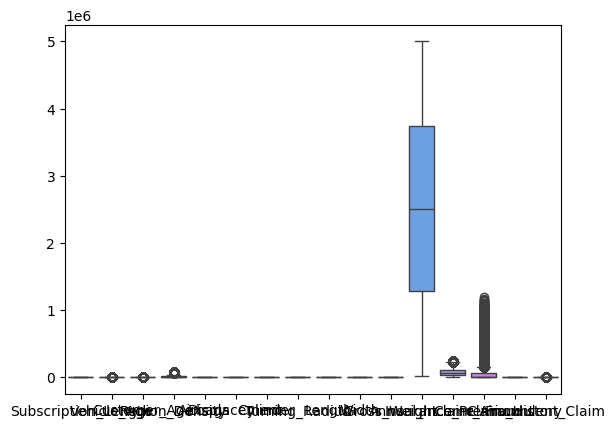

In [22]:
#So now we are done with filling the zeros now let us work on outliers. For that we use seaborn Boxplot
sns.boxplot(data=df_num)

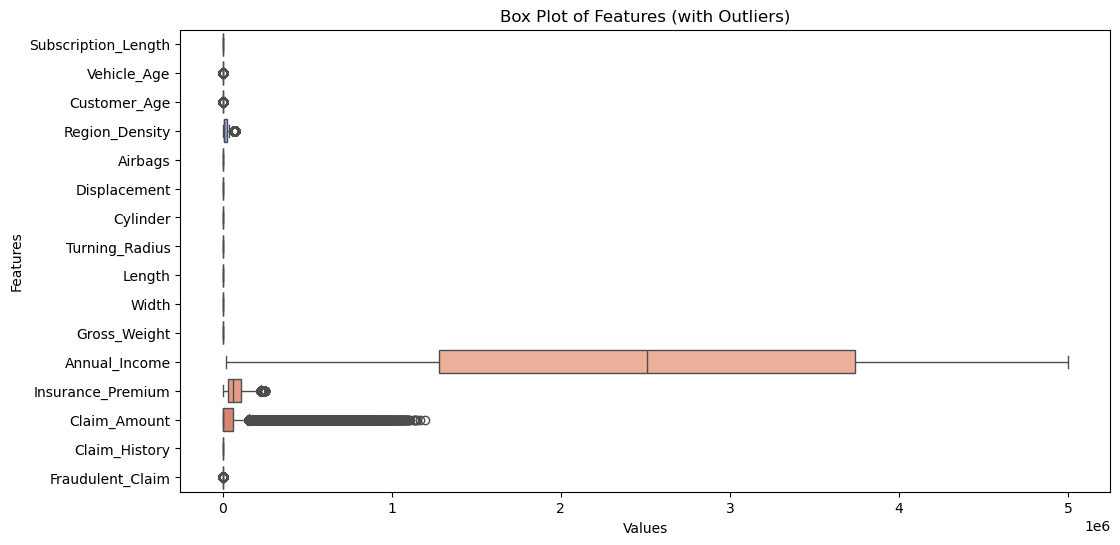

Subscription_Length        0
Vehicle_Age              334
Customer_Age             282
Region_Density          3647
Airbags                    0
Displacement               0
Cylinder                   0
Turning_Radius             0
Length                     0
Width                      0
Gross_Weight               0
Annual_Income              0
Insurance_Premium        371
Claim_Amount           10245
Claim_History              0
Fraudulent_Claim        6729
dtype: int64

In [23]:
# Detect outliers using IQR
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Outlier conditions (values outside 1.5*IQR range)
outliers = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))

# Count of outliers per column
outlier_counts = outliers.sum()

# Visualize using an improved box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_num, orient="h", palette="coolwarm", showfliers=True)
plt.title("Box Plot of Features (with Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

# Display count of outliers per feature
outlier_counts

In [24]:
# Treating Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping (Winsorization)
df_num= df_num.copy()
df_num = df_num.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Verify if outliers are capped
outliers_after = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()
outliers_after

Subscription_Length    0
Vehicle_Age            0
Customer_Age           0
Region_Density         0
Airbags                0
Displacement           0
Cylinder               0
Turning_Radius         0
Length                 0
Width                  0
Gross_Weight           0
Annual_Income          0
Insurance_Premium      0
Claim_Amount           0
Claim_History          0
Fraudulent_Claim       0
dtype: int64

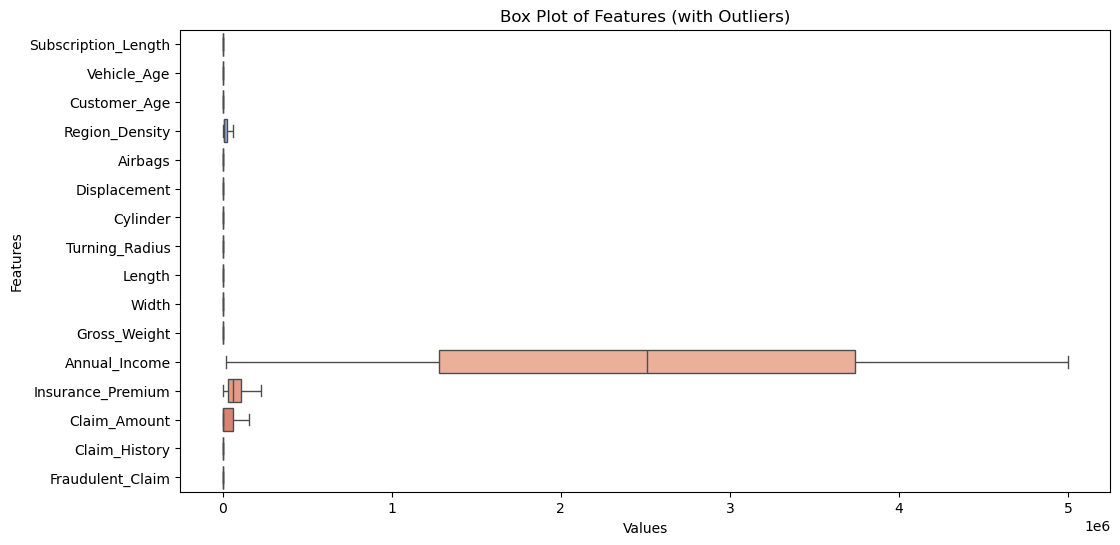

In [25]:
# Visualize after the outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_num, orient="h", palette="coolwarm", showfliers=True)
plt.title("Box Plot of Features (with Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

In [26]:
#Now let us proceed with the EDA part for this numerical dataframe. But for that let us now convert it into a pickle file.

In [27]:
with open('numerical_dataset.pkl', 'wb') as file:
    pickle.dump(df_num, file)

print("DataFrame saved as pickle file.")

DataFrame saved as pickle file.


In [28]:
df_num.columns

Index(['Subscription_Length', 'Vehicle_Age', 'Customer_Age', 'Region_Density',
       'Airbags', 'Displacement', 'Cylinder', 'Turning_Radius', 'Length',
       'Width', 'Gross_Weight', 'Annual_Income', 'Insurance_Premium',
       'Claim_Amount', 'Claim_History', 'Fraudulent_Claim'],
      dtype='object')